In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Natural constants
# Charge of electron
e = 1.60217662e-19 # C
# Electric constant
eps0 = 8.85418782e-12 # F/m
# reduced Planck constant
hbar = 1.0545718e-34 # J s

# Dipole strength D2
d = 3.584 * 10e-29 # C m

# Degeneracies
g0 = 1
g1 = 3
g2 = 5
g3 = 7


In [2]:
def deriv(t, n_initial, params):
    n1 = n_initial[0]
    n2 = n_initial[1]
    n3 = n_initial[2]
    
    B_13 = params[0]
    B_31 = params[1]
    gamma_31 = params[2]
    gamma_32 = params[3]
    Gamma_0 = params[4]
    N1 = params[5]
    N2 = params[6]
    


    n1dot = -n1*(B_13 + Gamma_0) + n3*(B_31 + gamma_31) + N1*Gamma_0
    n2dot = Gamma_0*(-n2 + N2) + n3*gamma_32
    n3dot = n1*B_13 - n3*(B_31 + gamma_32 + gamma_31 + Gamma_0)

    return n1dot, n2dot, n3dot

In [3]:
# Initial and final times.
t0 = 0
tf = 1000e-9
# Initial conditions: [X] = 1; [Y] = [Z] = 0.
N_V = 1
N1 = 3/8 * N_V
N2 = 5/8 * N_V
y0 = (N1, N2, 0)

# Parameters: B_13, B_31, gamma_31, gamma_32, Gamma_0, N1, N2.

# Einstein coefficients.
B_13_0 = (np.pi * e**2)/(eps0 * hbar**2 * g0) * 1/9 * d**2
B_13_2 = (np.pi * e**2)/(eps0 * hbar**2 * g2) * 5/18 * d**2

B_13 = B_13_0 + B_13_2

B_31 = 3 * B_13_0 + 3/5 * B_13_2

print(B_13, B_31)

gamma_31 = 0.75*33e6
gamma_32 = 0.25*33e6
Gamma_0 = 1.8e6

# Solve, using a method resilient to stiff ODEs.
soln = solve_ivp(deriv, (t0, tf), y0, method='Radau', args=([B_13, B_31, gamma_31, gamma_32, Gamma_0, N1, N2],))
print(soln.nfev, 'evaluations required.')

1.7532924647706735e-14 3.8572434224954817e-14
9 evaluations required.


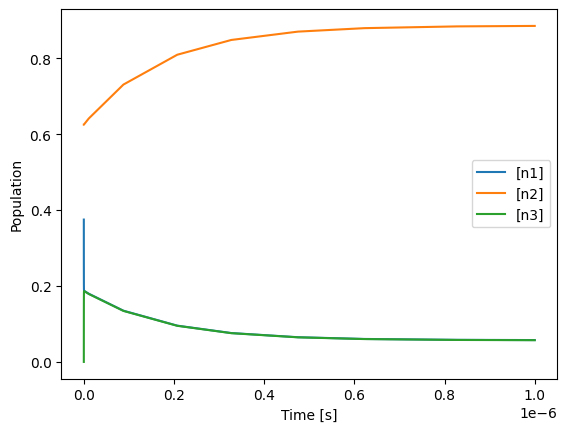

In [31]:

plt.plot(soln.t, soln.y[0], label='[n1]')
plt.plot(soln.t, soln.y[1], label='[n2]')
plt.plot(soln.t, soln.y[2], label='[n3]')
plt.xlabel('Time [s]')
plt.ylabel('Population')
plt.legend()
plt.show()
